In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import shap

# Data Pre-processing and Feature Preparation

In [2]:
# Import dataset
data_orig = pd.read_csv('Project_Data_EE4C12_SET_PV.csv')
data_orig

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [3]:
# Dataset transformation using one-hot encoding for multi-class classification

data = data_orig.drop('Fault_Type', axis=1) # remove the ordinary encoding column
data['Healthy'] = np.where(data_orig['Fault_Type'] == 0, 1, 0)
data['Short_Circuit'] = np.where(data_orig['Fault_Type'] == 1, 1, 0)
data['Broken_Cells'] = np.where(data_orig['Fault_Type'] == 2, 1, 0)
data['Broken_Strings'] = np.where(data_orig['Fault_Type'] == 3, 1, 0)
data

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Healthy,Short_Circuit,Broken_Cells,Broken_Strings
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,1,0,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,1,0,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,1,0,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,1,0,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,0,0,0,1
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,0,0,0,1
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,0,0,0,1
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,0,0,0,1


In [4]:
print('Dataset dimention: ', data.shape)
if data.isnull().values.any():
    print('Some values are missing')
else:
    print('Noo missing values')

Dataset dimention:  (12000, 11)
Noo missing values


In [5]:
# Training-testing sets split: from now on the testing set must not be part of any operation, in order to prevent data leak

training_set, testing_set = train_test_split(data, test_size=0.15, random_state=4720)

X_training = training_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
X_testing = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_training = training_set['System_Status']
y_mc_training = training_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

X_test = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_test = testing_set['System_Status']
y_mc_test = testing_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

In [6]:
#training_set

In [56]:
#testing_set

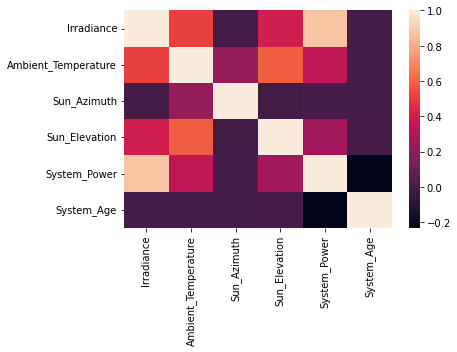

In [6]:
# Correlation matrix
corr_matrix = X_training.corr()
sn.heatmap(corr_matrix)
plt.show()

In [7]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_training)
X_training_scaled = scaler.transform(X_training)

In [8]:
y_1d=data_orig.iloc[:,7]

if i keep the same random state it will be the same split of the one-hot encoded y

In [9]:
y_1d_train, y_1d_test = train_test_split(y_1d, test_size=0.15, random_state=4720)

# Multi Classification Model 1

In [155]:
X_train, X_val, y_train_mc, y_val_mc = train_test_split(X_training_scaled, y_1d_train, test_size=0.15, random_state=4720)
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)
pol.fit(X_train)
X_train_pol = pol.transform(X_train)
X_val_pol = pol.transform(X_val)

In [172]:
class_weight={0:0.9,1:1.3,2:1.5,3:1}
lr = LogisticRegression(multi_class='multinomial',max_iter=1000,class_weight=class_weight)
y_pred = lr.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))

Accuracy: 0.6320261437908496


In [174]:
class_weight={0:0.9,1:1.3,2:1.5,3:1}
lr_pol = LogisticRegression(multi_class='multinomial',max_iter=1000,class_weight=class_weight)
y_pred_pol = lr_pol.fit(X_train_pol, y_train_mc).predict(X_val_pol)
print("Accuracy pol:", accuracy_score(y_val_mc, y_pred_pol))

Accuracy pol: 0.7196078431372549


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


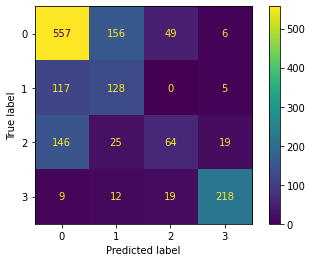

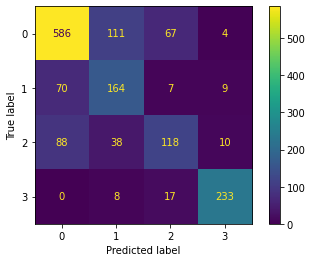

In [175]:
plot_confusion_matrix(lr,X_val,y_val_mc)
plot_confusion_matrix(lr_pol,X_val_pol,y_val_mc)

In [151]:
rfc = RandomForestClassifier(n_estimators=90)
y_pred = rfc.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))  

Accuracy: 0.7111111111111111


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


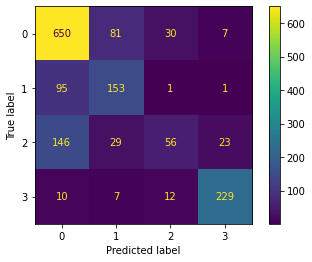

In [152]:
plot_confusion_matrix(rfc,X_val,y_val_mc)

In [69]:
C_list=[750,800,850]
for i in C_list:
    clf_svmgauss = svm.SVC(kernel='rbf',C=i).fit(X_train, y_train_mc)
    y_prediction_svmguass = clf_svmgauss.predict(X_val)
    Accuracy_svmG = accuracy_score(y_val_mc,y_prediction_svmguass)
    print("Accuracy with linear features: " + str(Accuracy_svmG))

Accuracy with linear features: 0.7810457516339869
Accuracy with linear features: 0.7830065359477124
Accuracy with linear features: 0.7823529411764706


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


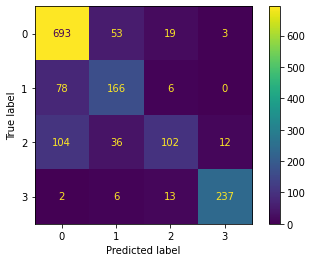

In [176]:
clf_svmgauss = svm.SVC(kernel='rbf',C=800).fit(X_train, y_train_mc)
plot_confusion_matrix(clf_svmgauss,X_val,y_val_mc)

In [68]:
C_list=[700,800,900]
for i in C_list:
    clf_svmgauss = svm.SVC(kernel='rbf',C=i).fit(X_train_pol, y_train_mc)
    y_prediction_svmguass = clf_svmgauss.predict(X_val_pol)
    Accuracy_svmG = accuracy_score(y_val_mc,y_prediction_svmguass)
    print("Accuracy with polynomial features: " + str(Accuracy_svmG))

Accuracy with polynomial features: 0.7601307189542483
Accuracy with polynomial features: 0.7633986928104575
Accuracy with polynomial features: 0.7640522875816993


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


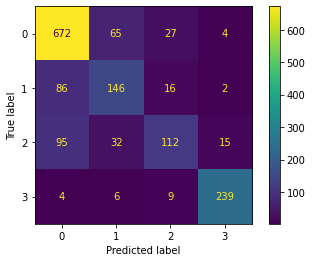

In [178]:
clf_svmgauss_pol = svm.SVC(kernel='rbf',C=900).fit(X_train_pol, y_train_mc)
plot_confusion_matrix(clf_svmgauss_pol,X_val_pol,y_val_mc)


heavy

In [153]:
bag = BaggingClassifier(base_estimator=svm.SVC(kernel='rbf',C=800, coef0=0.0, tol=1e-3),n_estimators=10, random_state=0)
y_pred = bag.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))

Accuracy: 0.7705882352941177


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


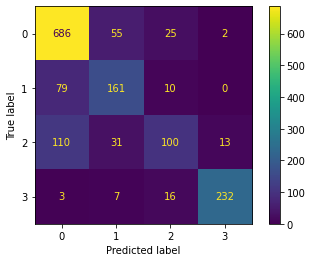

In [154]:
plot_confusion_matrix(bag,X_val,y_val_mc)

# Grafico NN

In [138]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers


'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

# Multi Classification Model 2

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dropout

In [11]:
# Function to build the network with Keras for Multiclass classification

def buildNetwork(layers, nodes, regularization=0.0, dropout_factor=0.0):
    input_nodes = 6
    output_nodes = 4
    model = Sequential()
    if (dropout_factor > 0.0 and dropout_factor < 1.0):
            model.add(Dropout(dropout_factor, input_shape=(input_nodes,)))
    model.add(Dense(nodes[0], input_dim=input_nodes, activation='relu')) # add the first layer: from input layer to first layer
    for i in range(1, layers):
        if (dropout_factor > 0.0 and dropout_factor < 1.0):
            model.add(Dropout(dropout_factor, input_shape=(nodes[i-1],)))
        model.add(Dense(nodes[i], activation='relu', kernel_regularizer=regularizers.l2(regularization)))
    model.add(Dense(output_nodes, activation='softmax')) # Important: dropout is not used on the output layer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # training the network
    return model

In [75]:
layers=3
nodes=[6,10,6]
model=buildNetwork(layers,nodes)

In [13]:
X_train, X_val,y_train_mc, y_val_mc = train_test_split(X_training_scaled,y_mc_training, test_size=0.15, random_state=4720)

In [126]:
history = model.fit(X_train, y_train_mc, epochs=620, batch_size=10)

867/867 [==============================] - 2s 2ms/step - loss: 0.4603 - accuracy: 0.8016


In [135]:
# evaluate the keras model
_,accuracy = model.evaluate(X_val, y_val_mc)   
print('Accuracy:')
print(accuracy)

48/48 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.8013
Accuracy:
0.801307201385498


In [136]:
y_mc_predict=model.predict(X_val,batch_size=10)
matrix = confusion_matrix(np.array(y_val_mc).argmax(axis=1), y_mc_predict.argmax(axis=1))
matrix

array([[688,  60,  18,   2],
       [ 71, 174,   4,   1],
       [ 94,  27, 119,  14],
       [  1,   8,   4, 245]], dtype=int64)

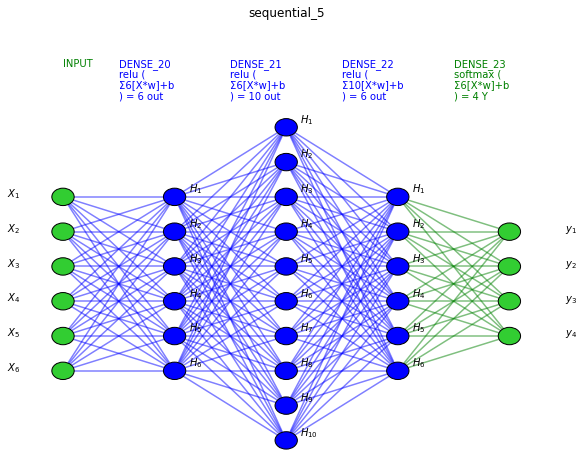

In [139]:
visualize_nn(model, description=True, figsize=(10,8))

# SHAP

In [140]:
explainer = shap.DeepExplainer(model,X_train)
shap_values = explainer.shap_values(X_val)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


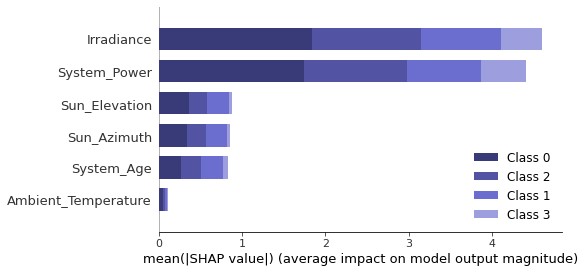

In [145]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values, X_val, plot_type="bar",feature_names=list(X_training.columns),color=pl.get_cmap("tab20b"))

# Testing

In [146]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_testing)
X_testing_scaled = scaler.transform(X_testing)

In [147]:
pred=model.predict(X_testing_scaled)
accuracy = accuracy_score(np.array(y_mc_test).argmax(axis=1),pred.argmax(axis=1))
print('Accuracy: %.2f' % (accuracy*100))
matrix = confusion_matrix(np.array(y_mc_test).argmax(axis=1), pred.argmax(axis=1))
matrix

Accuracy: 79.78


array([[797,  69,  42,   0],
       [ 90, 205,  11,   5],
       [ 99,  23, 151,  15],
       [  0,   6,   4, 283]], dtype=int64)